In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('bmh')

In [37]:
churn = pd.read_csv('data/churn_train.csv')

In [38]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                40000 non-null  float64
 1   avg_rating_by_driver    39838 non-null  float64
 2   avg_rating_of_driver    33472 non-null  float64
 3   avg_surge               40000 non-null  float64
 4   city                    40000 non-null  object 
 5   last_trip_date          40000 non-null  object 
 6   phone                   39681 non-null  object 
 7   signup_date             40000 non-null  object 
 8   surge_pct               40000 non-null  float64
 9   trips_in_first_30_days  40000 non-null  int64  
 10  luxury_car_user         40000 non-null  bool   
 11  weekday_pct             40000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [12]:
def pre_processing(churn):
    churn_ret = churn.copy()
    #bools to ints
    to_replace = {'luxury_car_user':{True:1,False:0},'phone':{'iPhone':1,'Android':0}}
    churn_ret = churn_ret.replace(to_replace)
    #Percentages were in 0-100, setting to 0-1
    churn_ret[['weekday_pct', 'surge_pct']] *= .01
    #Default NAs: ratings of 5, phone iphone
    na_replaces = {"avg_rating_by_driver" : 5, "avg_rating_of_driver" : 5, "phone" : 1}
    churn_ret = churn_ret.fillna(na_replaces)
    #Datetimes
    churn_ret['signup_date'] = pd.to_datetime(churn_ret['signup_date'])
    churn_ret['last_trip_date'] = pd.to_datetime(churn_ret['last_trip_date'])
    #Creating target
    churn_ret['churned'] = (churn_ret['last_trip_date'] < '2014-06-01').astype(int)
    churn_ret = churn_ret.drop('last_trip_date', axis = 1)
    #One hotting the city names
    churn_ret = pd.get_dummies(churn_ret, 'city')
    return churn_ret
x = pre_processing(churn)

In [13]:
x

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churned,city_Astapor,city_King's Landing,city_Winterfell
0,3.67,5.0,4.7,1.10,1.0,2014-01-25,0.154,4,1,0.462,0,0,1,0
1,8.26,5.0,5.0,1.00,0.0,2014-01-29,0.000,0,0,0.500,1,1,0,0
2,0.77,5.0,4.3,1.00,1.0,2014-01-06,0.000,3,0,1.000,1,1,0,0
3,2.36,4.9,4.6,1.14,1.0,2014-01-10,0.200,9,1,0.800,0,0,1,0
4,3.13,4.9,4.4,1.19,0.0,2014-01-27,0.118,14,0,0.824,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5.63,4.2,5.0,1.00,1.0,2014-01-25,0.000,0,0,1.000,0,0,1,0
49996,0.00,4.0,5.0,1.00,1.0,2014-01-24,0.000,1,0,0.000,1,1,0,0
49997,3.86,5.0,5.0,1.00,0.0,2014-01-31,0.000,0,1,1.000,1,0,0,1
49998,4.58,3.5,3.0,1.00,1.0,2014-01-14,0.000,2,0,1.000,1,1,0,0


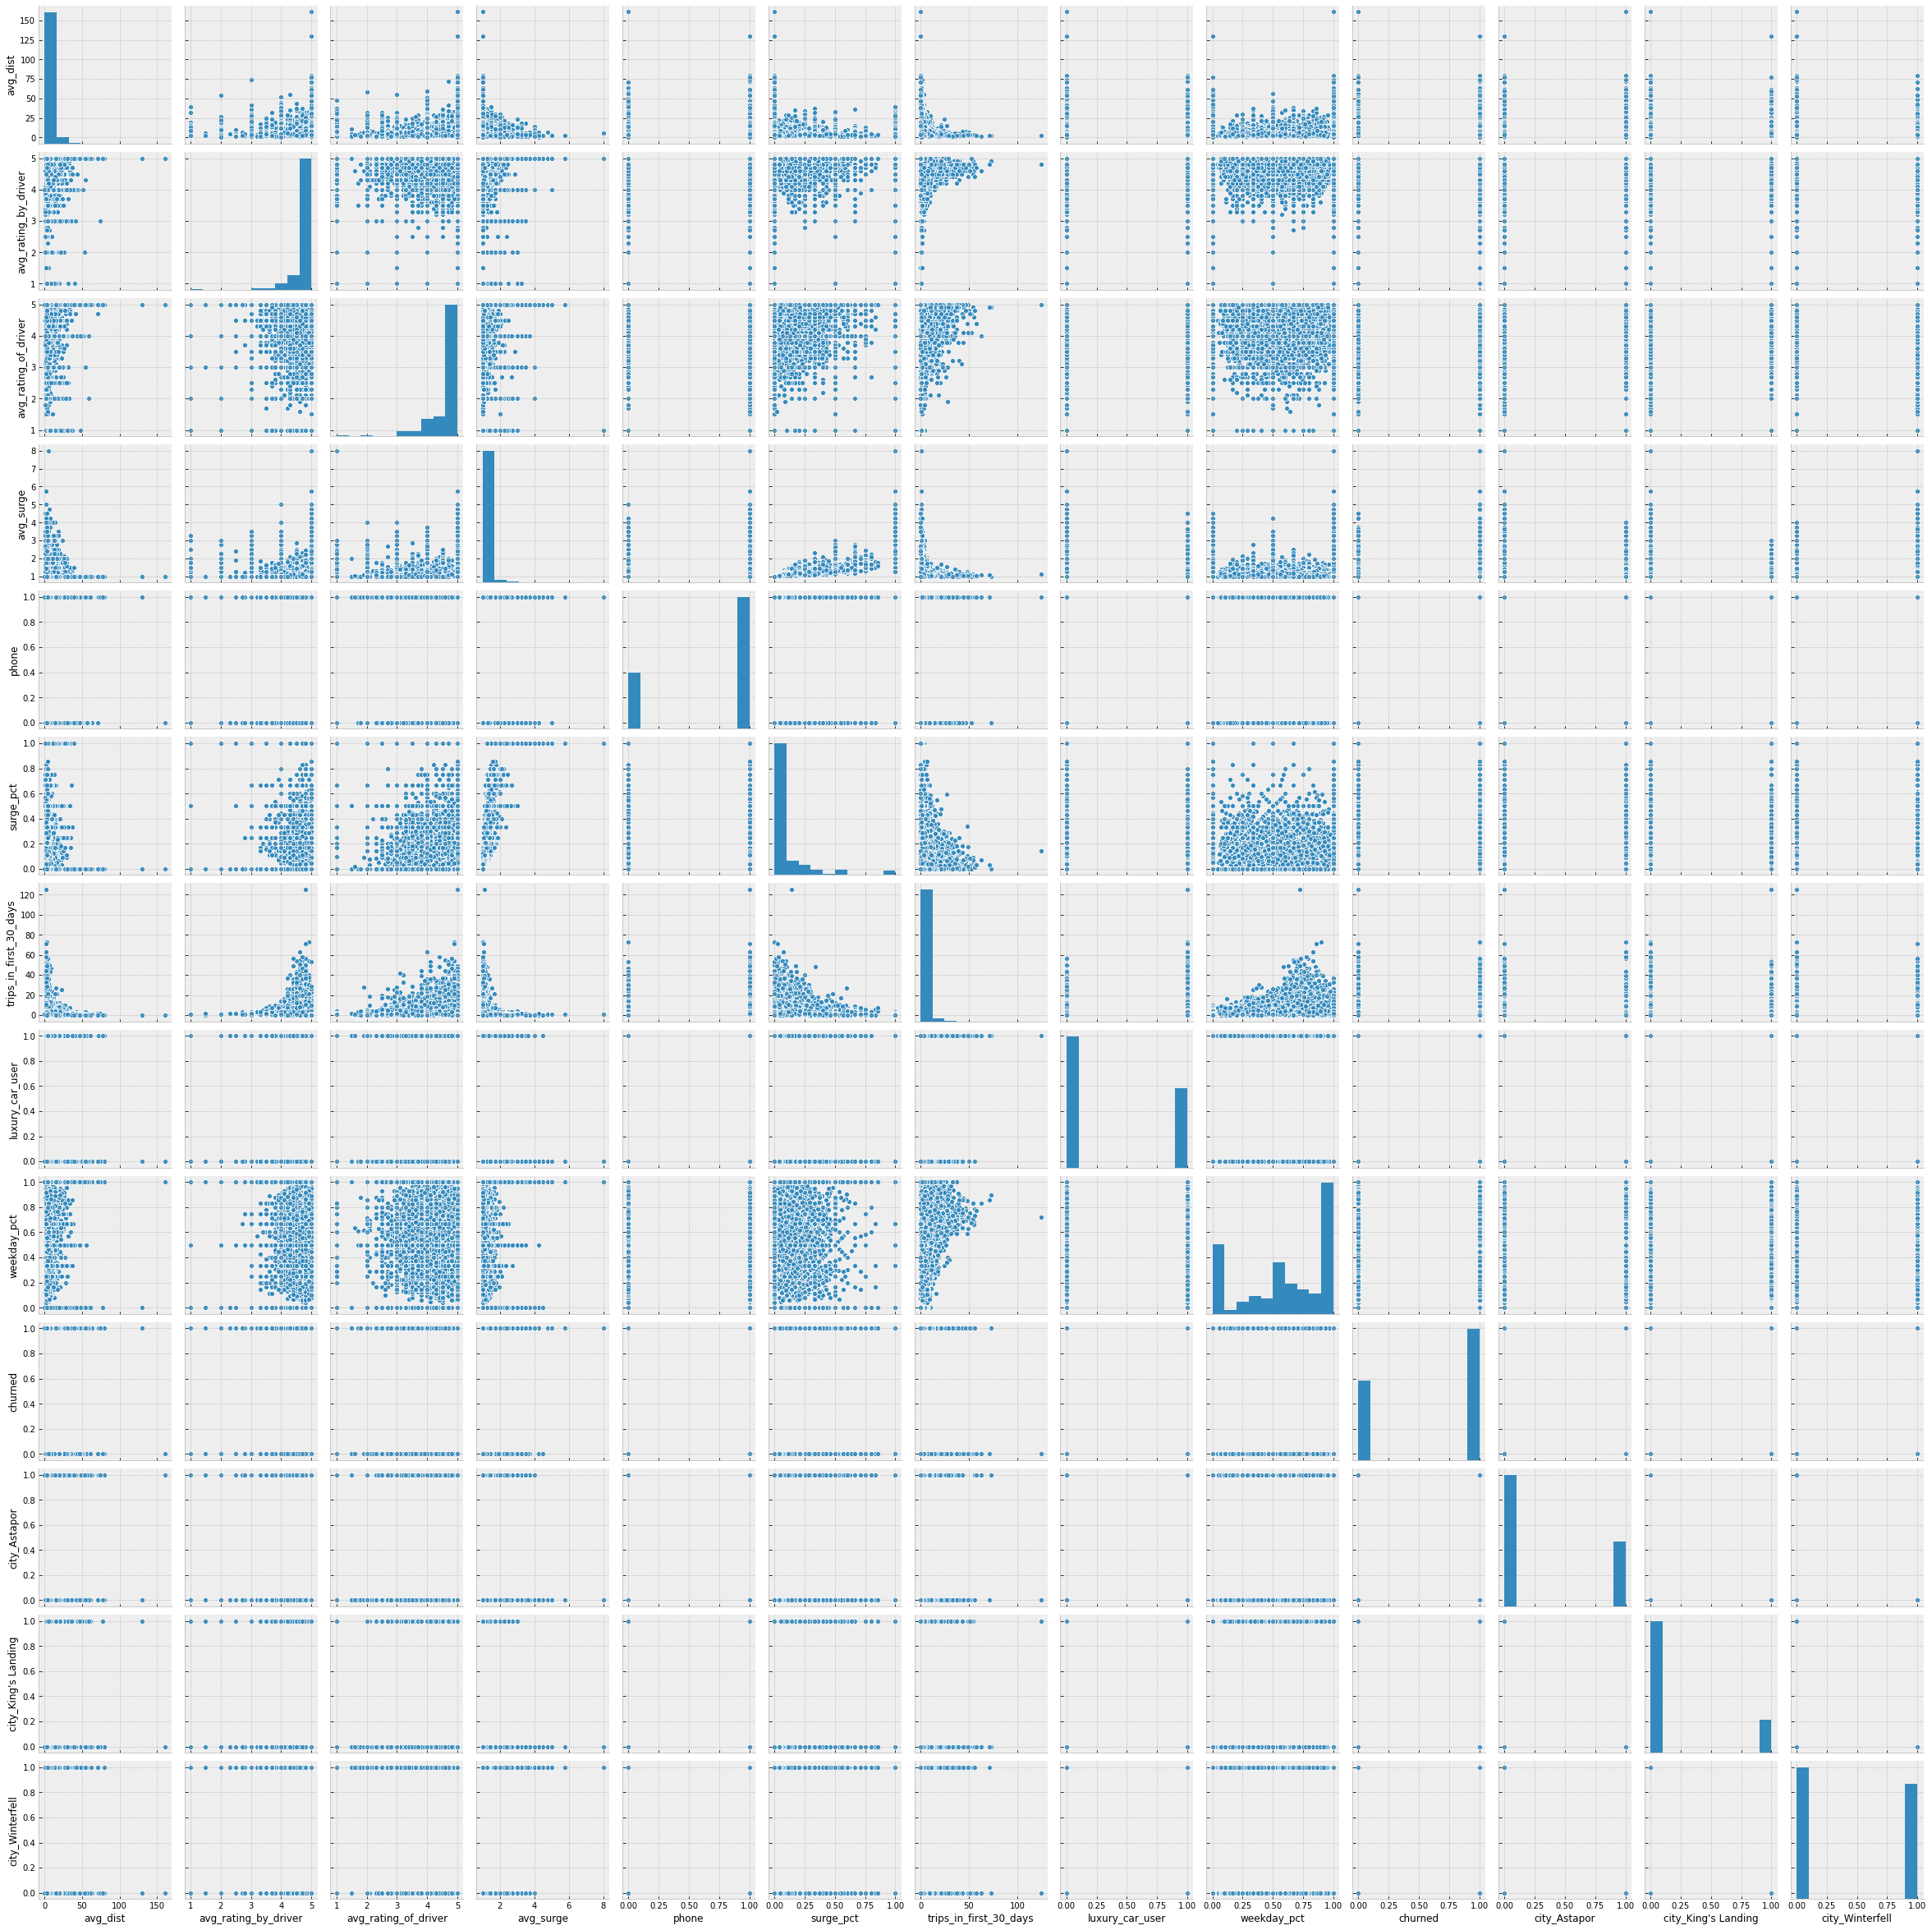

In [14]:
sns.pairplot(x)

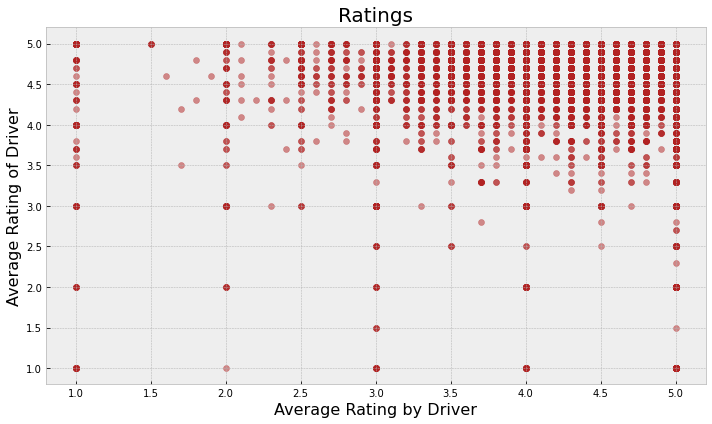

In [34]:
ratings = x[['avg_rating_of_driver','avg_rating_by_driver']]
correl = ratings.corr()
fig, ax = plt.subplots(1, figsize=(10,6))
ax.scatter(x['avg_rating_of_driver'], x['avg_rating_by_driver'], color='firebrick', alpha=0.5)
ax.set_xlabel('Average Rating by Driver', fontsize=16)
ax.set_ylabel('Average Rating of Driver', fontsize=16)
ax.set_title('Ratings', fontsize=20)
plt.tight_layout()
plt.savefig('images/ratings.png', bbox_inches='tight')

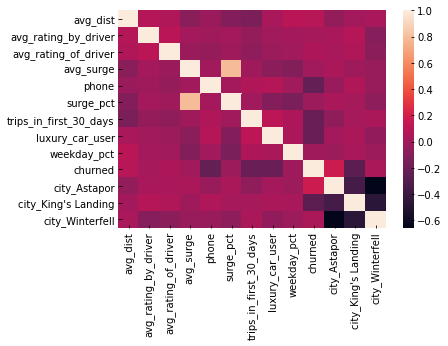

In [35]:

correl = x.corr()
sns.heatmap(correl)
plt.savefig('images/heatcorrmap.png',  bbox_inches='tight')


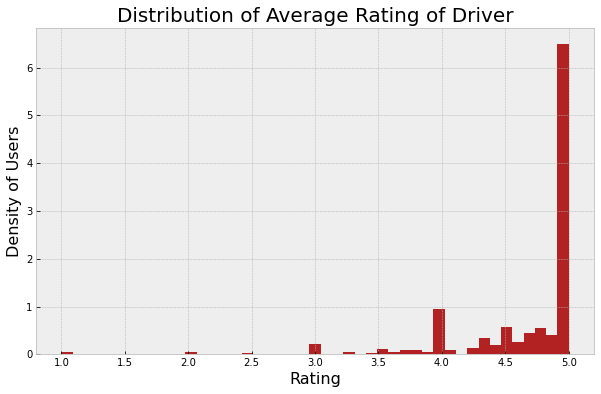

In [36]:
fig, ax = plt.subplots(1, figsize=(10,6))
ax.hist(x['avg_rating_of_driver'], bins = 45, density=True, color='firebrick')
ax.set_xlabel('Rating',fontsize=16)
ax.set_ylabel('Density of Users', fontsize=16)
ax.set_title('Distribution of Average Rating of Driver', fontsize=20)
plt.savefig('images/ratingshist.png',  bbox_inches='tight')